1000  Train Data Loaded
300  Test Data Loaded
Theta =  [100.15481913]
MSE Test:  9.332616851081493


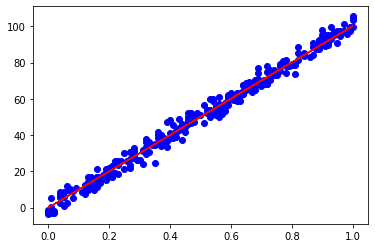

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_data():
  train_data = pd.read_csv('/content/Data-Train.csv')
  test_data = pd.read_csv('/content/Data-Test.csv',)
  print(len(train_data), " Train Data Loaded")
  print(len(test_data), " Test Data Loaded")
  return train_data, test_data

def normalization(data):
  data[:,0] = (data[:,0]) / data[:,0].max()
  return data

def prepare_data():
  train , test = load_data()
  train = train.to_numpy(dtype='float64')
  test = test.to_numpy(dtype='float64')
  train = normalization(train)
  test = normalization(test)
  x = train[: , 0:-1]
  y = train[: , -1]
  x_ = test[: , 0:-1]
  y_ = test[: , -1]
  return x,y,x_,y_

def learn_model(x, y):
  xxt = np.dot(x.T, x)
  xxt_inv = np.linalg.inv(xxt)
  xty = np.dot(x.T, y)
  theta = np.dot(xxt_inv, xty)
  print("Theta = ", theta)
  return theta

def predict(x, model):
  return np.dot(model.T, x.T).flatten()

def mse(y_, y):
  diff = np.subtract(y_, y)
  ms = np.power(diff, 2, dtype='float64')
  return np.sum(ms) / len(y)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, predict(X, model), color='red')    
    return

x_train, y_train, x_test, y_test = prepare_data()
cfmodel = learn_model(x_train, y_train)
predicted_y = predict(x_test, cfmodel)
print("MSE Test: " , mse(predicted_y, y_test))
lin_regplot(x_test,y_test, cfmodel)



MSE Train:  8.339910252067114


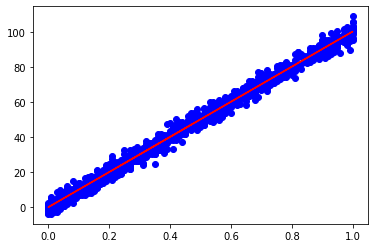

In [ ]:
predicted_y = predict(x_train, cfmodel)
print("MSE Train: " , mse(predicted_y, y_train))
lin_regplot(x_train,y_train, cfmodel)

In [ ]:
cfmodel

array([100.15481913])